In [2]:
from utils.save_data import clean_all_csv_files
clean_all_csv_files()

Phi_v2_4_ex3
making the model...
Metal device set to: Apple M2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0   

2023-02-21 16:22:12.105545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 16:22:12.105628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-21 16:22:12.280797: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-21 16:22:12.469950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


72/75 [===========================>..] - ETA: 0s - loss: 2.4954 - accuracy: 0.6905

2023-02-21 16:22:14.102284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 2s 22ms/step - loss: 2.4151 - accuracy: 0.6938 - val_loss: 0.5035 - val_accuracy: 0.7969
Epoch 2/20
75/75 [==============================] - 1s 20ms/step - loss: 0.4756 - accuracy: 0.7775 - val_loss: 0.3941 - val_accuracy: 0.8531
Epoch 3/20
75/75 [==============================] - 2s 21ms/step - loss: 0.3812 - accuracy: 0.8275 - val_loss: 0.3644 - val_accuracy: 0.8188
Epoch 4/20
75/75 [==============================] - 2s 20ms/step - loss: 0.3674 - accuracy: 0.8350 - val_loss: 0.3390 - val_accuracy: 0.8297
Epoch 5/20
75/75 [==============================] - 2s 20ms/step - loss: 0.3252 - accuracy: 0.8558 - val_loss: 0.3325 - val_accuracy: 0.8516
Epoch 6/20
75/75 [==============================] - 1s 20ms/step - loss: 0.3011 - accuracy: 0.8721 - val_loss: 0.3320 - val_accuracy: 0.8109
Epoch 7/20
75/75 [==============================] - 1s 19ms/step - loss: 0.2774 - accuracy: 0.8771 - val_loss: 0.2862 - val_accuracy: 0.8734
Epoch 8/20
75/75 [======

INFO:tensorflow:Assets written to: models/savedModels/Phi_v2_4_ex3/assets


INFO:tensorflow:Assets written to: models/savedModels/Phi_v2_4_ex3/assets


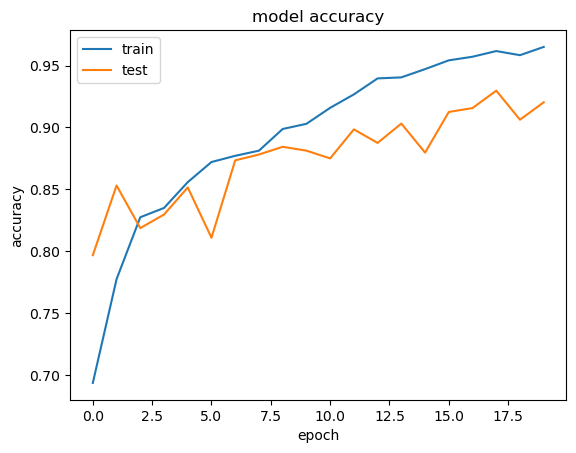

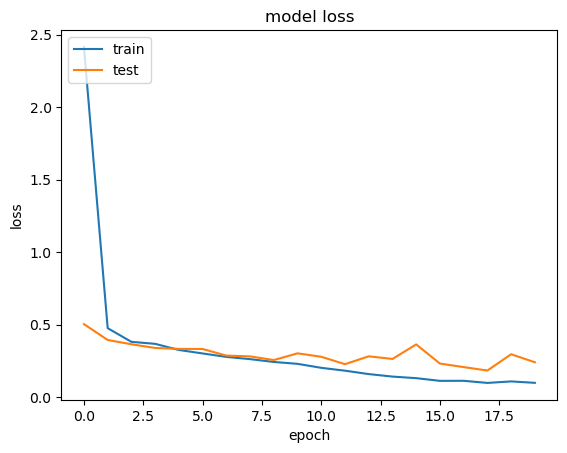

30/30 [==============================] - 0s 5ms/step


2023-02-21 16:22:43.628058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Confusion matrix:
[[691  28]
 [ 44 197]]


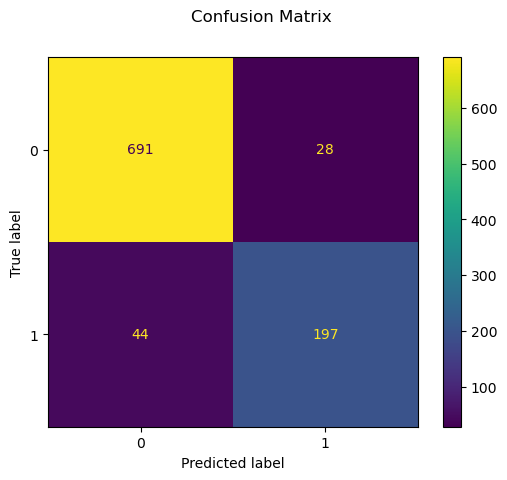

In [1]:
from models.trainModel import run as generate_new_model
from models.CNN.CNNmodel import CNN
different_traning_sizes = [100000]
for i in different_traning_sizes:
    name = f"Phi_v2_4_ex1"
    print(name)
    generate_new_model(constructor=CNN,
                           name=name, save=True, verbose=True,data_size_cap=i)

In [2]:
import tensorflow

In [1]:
from models.trainModel import load_model
ai_trails_testing = [load_model(f"Phi_6")]


Metal device set to: Apple M2


2023-03-12 15:42:33.027805: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-12 15:42:33.027927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import run

from TA.subset.try_all import TryAll
from TA.subset.random_w_hash import RandomWHashSelect
from TA.subset.random_select import RandomSelect
from TA.delta.sumOfExamples import SumOfExamples as delta
import time

from utils.global_props import set_e, set_B, set_mu
sampling_attempts = [1000000000] #"infinite"
deltas = [delta()]
sub_set_selectors = [TryAll()]

#different_e_values = range(25,0,-1)
#different_B_values = list(range(0,9))
different_mu_values = [1000000]#[0.1,1,10,11,12,13,14,15,16,17,18,19,20,50,100,150,200,300,400,500]
#different_mu_values = [40,50,60,70,80,85,90,95,100,105,110,115,120,130,140,150,200,500]



"""
for B in different_B_values:
set_B(B)
for e in different_e_values:
set_e(e)
"""
for mu in different_mu_values:
    print("attempting mu:",mu)
    set_mu(mu)
    run.main_run_system(re_train=False,clean_data=False, deltas=deltas, ai_models=ai_trails_testing,
                         differentNrAttempts=sampling_attempts,subset_selectors=sub_set_selectors, verbose=True)

attempting mu: 1000000
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000
Start load..
end load
loading probability map...
Done loading probability map!
early return at 28 1
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000
Start load..
end load
early return at 366 2
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000
Start load..
end load
early return at 2964 3
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000
Start load..
end load
early return at 16641 4
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SumOfExamples
attemps: 1000000000
Start load..
end load
early return at 68664 5
model: Phi_6
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta

In [4]:
ai_models =  ai_trails_testing

In [6]:
from utils.dataset import load_dataset
from utils.common import remove_digit_from_labels
from TA.Lambda.mean_square_error import MSE
from models.trainModel import load_model
import random
def sub_sample_test(valid_X, valid_labels, sample_size):
    all_data_zip = []
    for i in range(len(valid_labels)):
        all_data_zip.append((valid_X[i], valid_labels[i]))

    picks = random.sample(all_data_zip, sample_size)

    valid_X, valid_labels = zip(*picks)
    return valid_X, valid_labels

def prop_map_display(model):
    print("loading...")
    X, y, labels = load_dataset()
    print("loading done!")
    labels = remove_digit_from_labels(labels)
    mse = MSE()
    prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)
    for elem in prop_map.keys():
        print(str(prop_map[elem]*100).replace(".",","))

In [7]:
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## Phi_v2_1_ex2 ##########
loading...
loading done!
0,0
0,0
0,7763975155279503
0,0
1,6467065868263475
94,88817891373802
28,459119496855344
96,46153846153847
98,9778534923339
98,6159169550173
98,55305466237942
2,358490566037736
2,5
61,348684210526315
6,129032258064516
0,0


In [8]:
# this is going for all data. Should give same lambda then
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## Phi_v2_1_ex2 ##########
loading...
loading done!
0,0
0,0
0,7763975155279503
0,0
1,6467065868263475
94,88817891373802
28,459119496855344
96,46153846153847
98,9778534923339
98,6159169550173
98,55305466237942
2,358490566037736
2,5
61,348684210526315
6,129032258064516
0,0


In [23]:
i = [1250]
names = list(map(lambda x: f"CNN_aligment_test_{x}", i))
for name in names:
    print("#"*10,name,"#"*10)
    prop_map_display(name) 

########## CNN_aligment_test_1250 ##########
0,0
0,641025641025641
1,2464046021093003
21,547502448579824
30,125523012552303
50,10615711252654
46,09450337512054
89,60155490767735


In [10]:
from utils.dataset import load_dataset
X, y, labels = load_dataset()
from utils.common import remove_digit_from_labels
labels = remove_digit_from_labels(labels)

In [11]:
mse = MSE()
prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)

In [12]:
for elem in prop_map.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':0.0
'B':0.007763975155279503
'C':0.0
'D':0.016467065868263474
'AB':0.9488817891373802
'AC':0.28459119496855345
'AD':0.9646153846153847
'BC':0.989778534923339
'BD':0.986159169550173
'CD':0.9855305466237942
'ABC':0.02358490566037736
'ABD':0.025
'ACD':0.6134868421052632
'BCD':0.06129032258064516
'ABCD':0.0


In [21]:
from models.trainModel import load_model

model_10 = load_model("CNN_aligment_test_10")

OSError: No file or directory found at models/savedModels/CNN_aligment_test_10

In [33]:
prop_map_500 = mse._get_probaility_map_ai(ai_model=model_500, valid_X=X, valid_labels=labels)

In [34]:
for elem in prop_map_500.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [35]:
model_200 = load_model("train_set_200")

In [36]:
prop_map_200 = mse._get_probaility_map_ai(ai_model=model_200, valid_X=X, valid_labels=labels)

In [38]:
def show(prop_map):
    for elem in prop_map.keys():
        print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

In [39]:
show(prop_map_200)

'':0.0
'A':0.9948074426655128
'B':1.0
'C':0.8147982062780269
'AB':0.6394340483797353
'AC':0.4316353887399464
'BC':0.3077634011090573
'ABC':0.05031731640979148


In [43]:
show(prop_map_500)

'':0.0
'A':1.0
'B':1.0
'C':0.9690582959641255
'AB':0.6768598813327248
'AC':0.3315460232350313
'BC':0.20517560073937152
'ABC':0.010879419764279238


In [42]:
show(prop_map_600)

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [41]:
prop_map_600 = mse._get_probaility_map_ai(ai_model=model_600, valid_X=X, valid_labels=labels)

In [44]:
def theoretical_closest(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]**2
    return mse

In [46]:
for prop_map in [prop_map_200,prop_map_500,prop_map_600]:
    print(theoretical_closest(prop_map))

3.345973119369467
3.549351434370778
3.2164033617039736


In [47]:
def theoretical_closest_v2(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]
    return mse

4.2387558035820705
4.193519221035532
3.615239162675303
